In [1]:
rootF = 'D:/Data/Paper defocus/Defocus detection data/'

In [2]:
import os as os
import sys
import csv

from numpy import *
from scipy.stats import linregress, wilcoxon

from matplotlib.pyplot import *
import seaborn as sns
from matplotlib import gridspec
from matplotlib.gridspec import SubplotSpec

from shared.save_load import *

In [3]:
experiments = [20211129, 20211207, 20211208]
trials = [20, 37, 67]
run_nbs = [65, 58, 30]
N_cells = [21, 32, 29]

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

defocuses = linspace(40, -40, 9)
mouse_dF_to_um_ratio = -5 #um
mouse_offset = defocuses * mouse_dF_to_um_ratio

# Load data

### Load selected cell's responses to blurred images

In [4]:
clusters_all_experiments = []

for iExp, exp in enumerate(experiments):
    print (exp)
    trial = trials[iExp]
    run_nb = run_nbs[iExp]
    n_cells = N_cells[iExp]
    print (n_cells, 'cells')
    data_path = rootF + '/Modelling/exp' + str(exp) + '/'
    data_CNN_cells = load(data_path + '{}_spike_counts_CNN_{}cells_tr{}_run{}.npz'.format(exp, n_cells, trial, run_nb))

    spike_counts_mean = data_CNN_cells['spike_count_mean'] * 1/0.3
    spike_counts_std = data_CNN_cells['spike_count_std'] * 1/0.3
    clusters = data_CNN_cells['clusters']
    clusters_all_experiments.append(clusters)

    print (clusters)

20211129
21 cells
[  1  96 140 141 200 234 293 314 347 390 396 401 406 416 417 424 437 508
 558 583 614]
20211207
32 cells
[ 52  89  95  98 107 129 148 179 186 217 303 359 378 381 386 388 393 394
 396 399 402 414 417 418 433 435 459 472 491 498 507 575]
20211208
29 cells
[ 20  56  62  83 130 138 168 238 263 280 285 368 380 382 411 419 424 435
 450 463 464 466 480 482 497 507 511 513 613]


### CNN predictions

1000 images

In [5]:
model_spike_counts_all_experiments = []

for iExp, exp in enumerate(experiments):
    print (exp)
    trial = trials[iExp]
    run_nb = run_nbs[iExp]
    n_cells = N_cells[iExp]
    model_predictions = load(rootF + "/Modelling/exp" + str(exp) + "/model_predictions_mouse_cnn_1000images_" + str(exp) + "_" + \
                                str(n_cells) + "cells_tr" + str(trial) + "_run" + str(run_nb) + ".npz")
    model_spike_counts = model_predictions['predictions'] * 1/0.3
    imagesNbs = model_predictions['images']
    print (model_spike_counts.shape)

    model_spike_counts_all_experiments.append(model_spike_counts)

20211129
(999, 2, 9, 4, 21)
20211207
(1000, 2, 9, 4, 32)
20211208
(999, 2, 9, 4, 29)


### Typing data

In [6]:
Folder = rootF + '/MEA/RGC typing/calcium comparison/'

euler_labels_f = open(Folder + 'Baden Types');
euler_labels_f = csv.reader(euler_labels_f,delimiter=",");
euler_labels={}
c=0
for row in euler_labels_f:
    if c==0:
        stim_cond_head = row
        c=1
    else:
        euler_labels[c-1]= row
        c+=1     
        
euler_label_names = []

for i in range(len(euler_labels)):
    euler_label_names.append(euler_labels[i][0])

In [7]:
# For each type, we store the corresponding cells per experiment 

euler_labels_cells_all_experiments = []
# cells_clustering_all_experiments = []

for iLabel in range(len(euler_labels)):
    print (euler_labels[iLabel][0])
    euler_labels_cells = []
    
    for iExp, exp in enumerate(experiments):
        trial = trials[iExp]
        run_nb = run_nbs[iExp]
        n_cells = N_cells[iExp]
        exp_path = rootF + '/MEA/exp' + str(exp) + '/'

        # Load cells
        cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
        cells_clustering = array(cells_clustering)
        if exp == 20211208:
            cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_cleaned_clus12_2024')
        else:
            cell_types = load_obj(exp_path + str(exp) + '_celltype_Baden_cleaned_2024')

        cell_type = euler_labels[iLabel][0]
        selected_cells = cells_clustering[cell_types == iLabel]
        print (exp, selected_cells)

        euler_labels_cells.append(selected_cells)

    euler_labels_cells_all_experiments.append(euler_labels_cells)

# euler_labels_cells_all_experiments = np.array(euler_labels_cells_all_experiments)

OFF local OS
20211129 []
20211207 []
20211208 [ 86 136 276 292 318 389 438]
OFF DS
20211129 []
20211207 [ 63 120 298 583]
20211208 []
OFF step
20211129 [390]
20211207 []
20211208 []
OFF slow
20211129 [140 508 625]
20211207 [240 253 277 378]
20211208 [ 20 125 195]
OFF alpha sustained
20211129 [437 677]
20211207 [ 26 421]
20211208 []
ON-OFF JAM-B
20211129 [399 401]
20211207 [205 507]
20211208 [138 263 271 411 419 420 421 450 464 471 480]
OFF sustained
20211129 []
20211207 [394 414 433 459 471 515]
20211208 []
OFF alpha transient
20211129 [ 79 422]
20211207 []
20211208 [ 10 361]
OFF mini alpha transient
20211129 []
20211207 [148 303 398 426 506 538]
20211208 [210 382 387 441 466 497 576 580 605 613]
ON-OFF local-edge W3
20211129 [188 614]
20211207 [392]
20211208 [368]
ON-OFF local
20211129 []
20211207 [44]
20211208 [83]
ON-OFF DS 1
20211129 []
20211207 []
20211208 []
ON-OFF DS 2
20211129 []
20211207 []
20211208 [359 532 592]
ON-OFF local OS
20211129 [ 27 558 681]
20211207 [165]
20211208 [

In [8]:
OFF_slow = hstack([euler_labels_cells_all_experiments[3][0], euler_labels_cells_all_experiments[3][1], euler_labels_cells_all_experiments[3][2]])
ON_OFF_local = hstack([euler_labels_cells_all_experiments[13][0], euler_labels_cells_all_experiments[13][1], euler_labels_cells_all_experiments[13][2]])

OFF_slow

array([140, 508, 625, 240, 253, 277, 378,  20, 125, 195], dtype=int64)

# Figures

ON OFF local OS
130
OFF slow
20
ON alpha
513


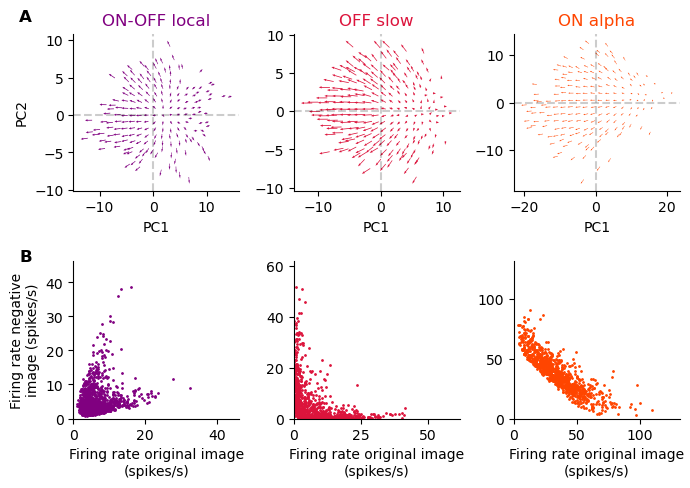

In [10]:
idx_ref = 0
src = 0

fig = figure(figsize=(7, 5))
GS = fig.add_gridspec(2, 3)

#################################### NEGATIVE IMAGES ##########################################################

##### ON-OFF local
print ('ON OFF local OS')
iExp = 2
cell_nb = 130
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0]
print (cell_nb)

### Vector field
ax = fig.add_subplot(GS[0,0])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)
data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']
for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='purple')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='purple')
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('ON-OFF local', color='purple', fontsize = 12)
ax.text(-25, 12.5, 'A', color='k', fontsize = 12, weight='bold')

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(GS[1,0])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_ylabel('Firing rate negative\nimage (spikes/s)')
ax.set_xlabel('Firing rate original image\n(spikes/s)')
ax.text(-15, lim, 'B', color='k', fontsize = 12, weight='bold')

##### OFF slow, cluster 20
print ('OFF slow')
iExp = 2
cell_nb = 20 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

### Vector field
ax = fig.add_subplot(GS[0,1])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)
data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']
for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='crimson')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='crimson')
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_title('OFF slow', color='crimson', fontsize = 12)

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(GS[1,1])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'crimson')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xlabel('Firing rate original image\n(spikes/s)')

##### ON alpha, cluster 449
print ('ON alpha')
iExp = 2
cell_nb = 513 #435 
index = where(clusters_all_experiments[iExp] == cell_nb)[0][0] 

print (cell_nb)

### Vector field
ax = fig.add_subplot(GS[0,2])

### PCA components
arrow_file = rootF + '/Modelling/exp{}/trial{}_cell{}_binned_data_for_arrow_plot.npz'\
                .format(experiments[iExp], trials[iExp], cell_nb)
data_arrows = np.load(arrow_file)
PC1 = data_arrows['PC1']
PC2 = data_arrows['PC2']

### Arrow plots
binned_arrowtails = data_arrows['tails']
binned_arrowheads = data_arrows['heads']
for i,j in enumerate(binned_arrowtails[:,0]):
    if i==0:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='orangered')
    else:
        ax.arrow(j,binned_arrowtails[i,1],binned_arrowheads[i,0],binned_arrowheads[i,1],width=0.1,lw=0,color='orangered')
ax.axvline(0, color='k',ls='--',alpha=0.2)
ax.axhline(0, color='k',ls='--',alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('PC1')
ax.set_title('ON alpha', color='orangered', fontsize = 12)

### Scatter
idx_scatter = 4
lim = 1.2*amax(model_spike_counts_all_experiments[iExp][:, :, idx_scatter, src, index])
ax = fig.add_subplot(GS[1,2])
ax.scatter(model_spike_counts_all_experiments[iExp][:, 0, idx_scatter, src, index], \
           model_spike_counts_all_experiments[iExp][:, 1, idx_scatter, src, index],\
            s=1, color = 'orangered')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, lim)
ax.set_ylim(0, lim)
ax.set_xlabel('Firing rate original image\n(spikes/s)')

tight_layout()

### Save figure
fig_path = 'T:/Documents/Papier defocus/figures/papier/last version/'
fsave = fig_path 
fig.savefig(fsave+'FigS1.png', format='png', dpi=300)
fig.savefig(fsave+'FigS1.pdf', format='pdf', dpi=300)
# fig.savefig(fsave+'Fig4_v2.eps', format='eps')